In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()

In [5]:
np.random.seed(500)

In [231]:
df=pd.read_csv('root2aiData.csv')  # loading the csv file into dataframe.

In [232]:
df.head(10)

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
5,agarwal head bank,Blockchain
6,several data security regulatory oversight wou...,Blockchain
7,relevance transaction register available publi...,Blockchain
8,technology need transaction intermediary clear...,Blockchain
9,seven bank morgan chase already support certai...,Blockchain


In [233]:
df.shape

(22704, 2)

In [234]:
df.isnull().sum()

Text      3
Target    0
dtype: int64

There are only 3 values missing out of 22704. Hence, we will drop those three values. 

In [235]:
df.dropna(how='any',inplace=True)  

In [236]:
df.isnull().sum()

Text      0
Target    0
dtype: int64

In [237]:
df['Target'].unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

There are total total 11 different categories in which our text topic is divided. i.e. 11 different classes.

#### Stemming

In [18]:
from nltk.stem.snowball import SnowballStemmer

In [238]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

In [239]:
# Split the sentences to lists of words.
df['Text'] = df['Text'].str.split()

In [240]:
df['Text'] = df['Text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [241]:
df['Text']

0        [reserv, bank, form, expert, committe, base, i...
1           [director, could, play, role, financi, system]
2        [preliminari, discuss, secur, transact, studi,...
3        [secur, inde, prove, essenti, transform, finan...
4        [bank, settlement, normal, take, three, day, b...
                               ...                        
22699    [fourth, studi, discuss, blockchain, technolog...
22700    [book, finish, state, biggest, issu, emerg, fo...
22701                                [peopl, cultur, cess]
22702    [author, challeng, execu, tive, lead, chang, s...
22703    [chang, data, driven, cultur, come, bottom, mu...
Name: Text, Length: 22701, dtype: object

In [242]:
#Join list of words into sentences.
df['Text']=df['Text'].str.join(" ")

In [243]:
df['Text']

0        reserv bank form expert committe base institut...
1                  director could play role financi system
2        preliminari discuss secur transact studi resea...
3        secur inde prove essenti transform financi sys...
4        bank settlement normal take three day base pay...
                               ...                        
22699    fourth studi discuss blockchain technolog enab...
22700    book finish state biggest issu emerg fourth in...
22701                                    peopl cultur cess
22702    author challeng execu tive lead chang stop ask...
22703      chang data driven cultur come bottom must start
Name: Text, Length: 22701, dtype: object

In [244]:
#Dividing data into independent(X) and dependent(y) features.
X=df['Text']
y=df['Target']

#### Division of data 

In [29]:
from sklearn.model_selection import train_test_split

In [245]:
#splitting both independent and dependent features into training and test data.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=np.random)

In [251]:
print('Unique output variable -  {}'.format(len(y.unique())))
print('No. of samples in training data - {}'.format(len(X_train)))
print('No. of samples in test data - {}'.format(len(X_test)))

Unique output variable -  11
No. of samples in training data - 15890
No. of samples in test data - 6811


In [247]:
y_train.value_counts()

FinTech             6005
Cyber Security      1866
Bigdata             1591
Reg Tech            1556
credit reporting    1219
Blockchain           938
Neobanks             738
Microservices        679
Stock Trading        542
Robo Advising        508
Data Security        248
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

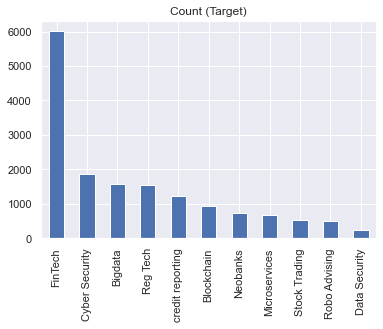

In [248]:
y_train.value_counts().plot(kind='bar', title='Count (Target)')

In [249]:
y_test.value_counts()

FinTech             2546
Cyber Security       774
Bigdata              676
Reg Tech             650
credit reporting     529
Blockchain           437
Neobanks             331
Microservices        295
Stock Trading        245
Robo Advising        229
Data Security         99
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

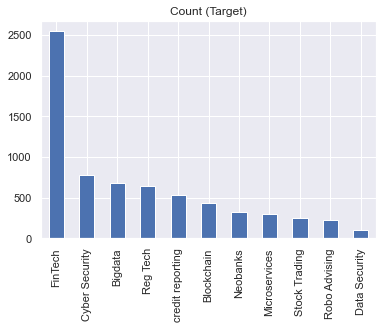

In [250]:
y_test.value_counts().plot(kind='bar', title='Count (Target)')

The data looks imbalanced

#### Word Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

Using "vectorizer.fit_transform()" training data is converted into Document transform matrix.

document transform matrix converts words in the sentence to features 
with their value showing symantic importance of the words
 
 values=(TF*IDF)

In [252]:
vectorizer=TfidfVectorizer(stop_words='english') #ingnoring common english pronous using stop_words='english'

In [ ]:
X_train_DTmatrix=vectorizer.fit_transform(X_train)
X_test_DTmatrix=vectorizer.transform(X_test)

#### Oversampling

In [14]:
from imblearn.over_sampling import RandomOverSampler

Using "RandomOversampler()" for oversampling the classes with minimum occurence frequrncy

In [253]:
ros = RandomOverSampler()

In [254]:
X_train_DTmatrix, y_train = ros.fit_resample(X_train_DTmatrix, y_train)  # Oversampling training data

In [255]:
y_train.value_counts()

FinTech             6005
Bigdata             6005
credit reporting    6005
Stock Trading       6005
Neobanks            6005
Data Security       6005
Robo Advising       6005
Blockchain          6005
Cyber Security      6005
Reg Tech            6005
Microservices       6005
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

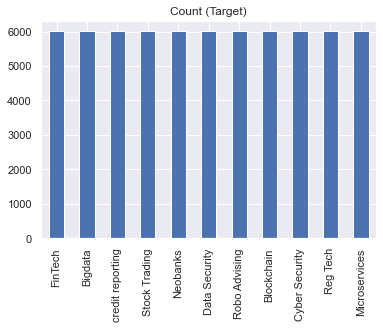

In [256]:
y_train.value_counts().plot(kind='bar', title='Count (Target)')

In [257]:
X_test_DTmatrix, y_test = ros.fit_resample(X_test_DTmatrix, y_test)   #Oversampling test data

In [258]:
y_test.value_counts()

Robo Advising       2546
Blockchain          2546
FinTech             2546
Bigdata             2546
Cyber Security      2546
credit reporting    2546
Reg Tech            2546
Stock Trading       2546
Neobanks            2546
Data Security       2546
Microservices       2546
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

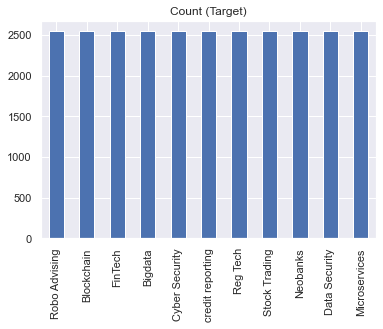

In [259]:
y_test.value_counts().plot(kind='bar', title='Count (Target)')

#### 1. Naive Bayes Classifier

In [66]:
from sklearn.naive_bayes import MultinomialNB

As of now, we have completed pre-processing of the data.

Now we will train the model on processed data using Naive Bayes's classifier.
Naive Baye's classifier is widely used for text classification problems.
Naive Baye's classifier predicts based on occurance of the word in a sentence. 
It assumes that every feature(in our case occurance of particular words) is independent of other.

But this classifier algorithm fails when any new word comes as an input, beacuse it predicts probability of that word as zero.
And hence every feature being independent the output probability is zero.

In [226]:
print(X_train_DTmatrix.shape)
print(y_train.shape)

(15890, 6491)
(15890,)


In [227]:
#training model on processed train data
model=MultinomialNB(alpha=0.5)
model.fit(X_train_DTmatrix, y_train)

MultinomialNB(alpha=0.5)

In [228]:
#predicting dependent variable (particularly speaking, y_test)
predicted_y=model.predict(X_test_DTmatrix)

In [229]:
#predicting dependent variable on training data
predicted_y_train=model.predict(X_train_DTmatrix)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

Evaluating the classifier model by it's training and teasting accuracy and the confusion matrix. 

In [173]:
print("The training accuracy of Naive Bayes is {}".format(accuracy_score(y_train,predicted_y_train)))

The training accuracy is 0.8225769910435137


In [174]:
print("The test accuracy of naive Bayes is {}".format(accuracy_score(y_test, predicted_y)))

The accuracy is 0.5872468763464024


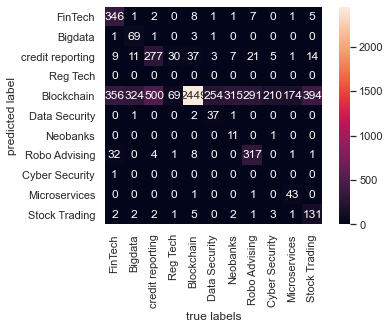

In [230]:
# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_y)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y_train.unique(),yticklabels=y_train.unique())
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

### -----------------------------------------------------------------------------------------------------------------------------------------------------

Naive Bayes performance improved after oversampling

Now we will try to build the model using SVM.
SVM is also one algorithm which is popularly used for text classification

In [112]:
from sklearn import svm

In [265]:
# Classifier - Algorithm - SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [266]:
# fit the training dataset on the classifier
SVM.fit(X_train_DTmatrix,y_train)

SVC(gamma='auto', kernel='linear')

In [267]:
# predict the labels on test dataset
predictions_SVM = SVM.predict(X_test_DTmatrix)

In [268]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test))

SVM Accuracy Score ->  0.5464186245804471


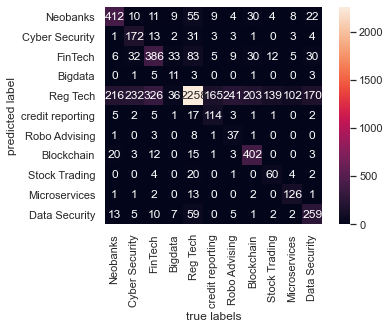

In [84]:
# plot the confusion matrix
mat = confusion_matrix(y_test, predictions_SVM)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y_train.unique(),yticklabels=y_train.unique())
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()


### --------------------------------------------------------------------------------------------------------------------------------------------------------

SVM performance was better before oversampling but reduced after oversampling,

SVM test accuracy (without oversampling) = 0.622

SVM test accuracy (with oversampling)    = 0.5498


This may be due to, after oversampling the model trained on it will be baised to the oversampled class.